In [1]:
%matplotlib inline

In [2]:
import argparse

from fastai.conv_learner import *

In [3]:
from dataloader import PartDataset
from pointnet import PointNetDenseCls2

In [4]:
num_points = 512
data_dir = 'E:/PROJECTS/NTUT/PointNet/pointnet1_pytorch/DATA/Shapenet/shapenetcore_partanno_segmentation_benchmark_v0'
trn_ds = PartDataset(root=data_dir, npoints=num_points, classification=False, class_choice=['Airplane'])
val_ds = PartDataset(root=data_dir, npoints=num_points, classification=False, class_choice=['Airplane'], train=False)
num_classes = 5

trn_dl = DataLoader(trn_ds, batch_size=4, shuffle=True, num_workers=0, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=0, pin_memory=True)
tes_dl = None

{'Airplane': 0}
{'Airplane': 0}


In [5]:
model_data = ModelData('DATA/Shapenet/shapenetcore_partanno_segmentation_benchmark_v0', trn_dl, val_dl)

model = PointNetDenseCls2(num_points=num_points, k=num_classes)

optimizer = optim.Adam
criterion = F.cross_entropy
learner = Learner(model_data, BasicModel(to_gpu(model)), opt_fn=optimizer, crit=criterion)

 62%|████████████████████████████████████████████▌                           | 333/538 [02:55<01:32,  2.22it/s, loss=4.1]

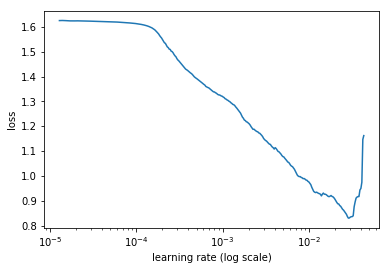

In [6]:
learner.lr_find()
learner.sched.plot()

In [ ]:
lr = 5e-3
learner.fit(lrs=lr, n_cycle=2, cycle_len=3)

epoch      trn_loss   val_loss                                                                                           
    0      0.390521   0.417774  
    1      0.309826   0.297748                                                                                           


In [11]:
lrs = np.array([lr/100, lr/10, lr])
learner.lr_find(lrs)
learner.sched.plot(0)

AssertionError: 

In [12]:
learner.fit(lrs=lrs/10, n_cycle=2, cycle_len=5)

AssertionError: 